In [72]:
%matplotlib  inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from plotting_utils import label_prep, label_sample, figure_path
from sequencing_tools.viz_tools import color_encoder, okabeito_palette, simpsons_palette, maximum_palette
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [58]:
size_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/fragment_sizes'
f_files = glob.glob(size_path + '/*.feather')
df = pd.concat(map(lambda x: pd.read_feather(x)\
                       .assign(prep = os.path.basename(x)), 
                   f_files))  \
    .assign(prep = lambda d: d.prep.str.replace('.feather$',''))\
    .groupby(['isize','prep'], as_index=False)\
    .agg({'size_count':'sum'})\
    .query('isize < 500')\
    .assign(size_fraction = lambda d: d.groupby('prep').size_count.transform(lambda x: 100*x/x.sum()))\
    .assign(prep = lambda d: d.prep.map(label_prep))\
    .sort_values('isize')
df.head()

,isize,prep,size_count,size_fraction
0,15,EV,3157,0.108557
13,15,untreated,1413,0.004641
12,15,DNase I,10302,0.006764
11,15,DNase I - 3'P,1358,0.004480
9,15,DNase I + Frag,1812,0.003650


/stor/work/Lambowitz/cdw2854/src/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


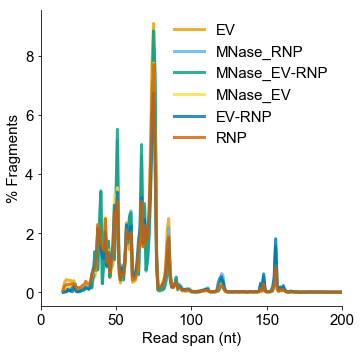

In [74]:
p = sns.FacetGrid(data = df\
                      .pipe(lambda d: d[~d.prep.str.contains('genome|[Pp]oly')])\
                      .pipe(lambda d: d[d.prep.str.contains('EV|RNP')]),
                 hue = 'prep',
                 palette = okabeito_palette(),
                 size = 5)
p.map(plt.plot, 'isize',  'size_fraction', alpha=0.8, linewidth=3)
p.set(xlim=(0,200))
#lgd =p.add_legend()
p.fig.axes[0].legend(loc = 'upper right',title='', 
                     fontsize=15,
                    frameon=False)
p.set_axis_labels('Read span (nt)', '% Fragments')
p.savefig(figure_path + '/EV_isize.pdf')